### Import Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

### Load Dataset

In [2]:
df = pd.read_csv('./data/stroke_data.csv')

In [3]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,58,1,0,1,0,0,87.96,39.2,0,0
1,1,70,0,0,1,0,1,69.04,35.9,1,0
2,1,52,0,0,1,0,0,77.59,17.7,1,0
3,1,75,0,1,1,1,1,243.53,27.0,0,0
4,1,32,0,0,1,0,1,77.67,32.3,2,0


### Dataset Information

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29065 entries, 0 to 29064
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             29065 non-null  int64  
 1   age                29065 non-null  int64  
 2   hypertension       29065 non-null  int64  
 3   heart_disease      29065 non-null  int64  
 4   ever_married       29065 non-null  int64  
 5   work_type          29065 non-null  int64  
 6   residence_type     29065 non-null  int64  
 7   avg_glucose_level  29065 non-null  float64
 8   bmi                29065 non-null  float64
 9   smoking_status     29065 non-null  int64  
 10  stroke             29065 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 2.4 MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
gender,29065.0,0.614210,0.486790,0.00,0.00,1.00,1.00,1.00
age,29065.0,47.676174,18.732941,10.00,32.00,48.00,62.00,82.00
hypertension,29065.0,0.111509,0.314766,0.00,0.00,0.00,0.00,1.00
heart_disease,29065.0,0.052159,0.222351,0.00,0.00,0.00,0.00,1.00
ever_married,29065.0,0.746155,0.435217,0.00,0.00,1.00,1.00,1.00
work_type,29065.0,0.545089,0.839828,0.00,0.00,0.00,1.00,4.00
residence_type,29065.0,0.497953,0.500004,0.00,0.00,0.00,1.00,1.00
avg_glucose_level,29065.0,106.405639,45.272453,55.01,77.63,92.13,113.91,291.05
bmi,29065.0,30.054684,7.193951,10.10,25.00,28.90,33.90,92.00
smoking_status,29065.0,0.672458,0.805419,0.00,0.00,0.00,1.00,2.00


### Exploratory Data Analysis

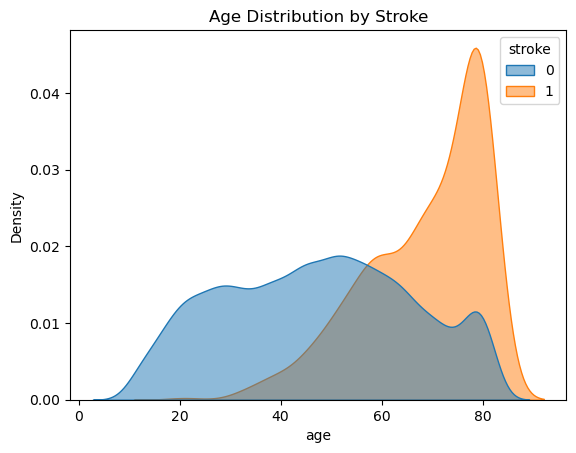

In [6]:
sns.kdeplot(data=df, x='age', hue='stroke', fill=True, common_norm=False, alpha=0.5)
plt.title('Age Distribution by Stroke')
plt.show()

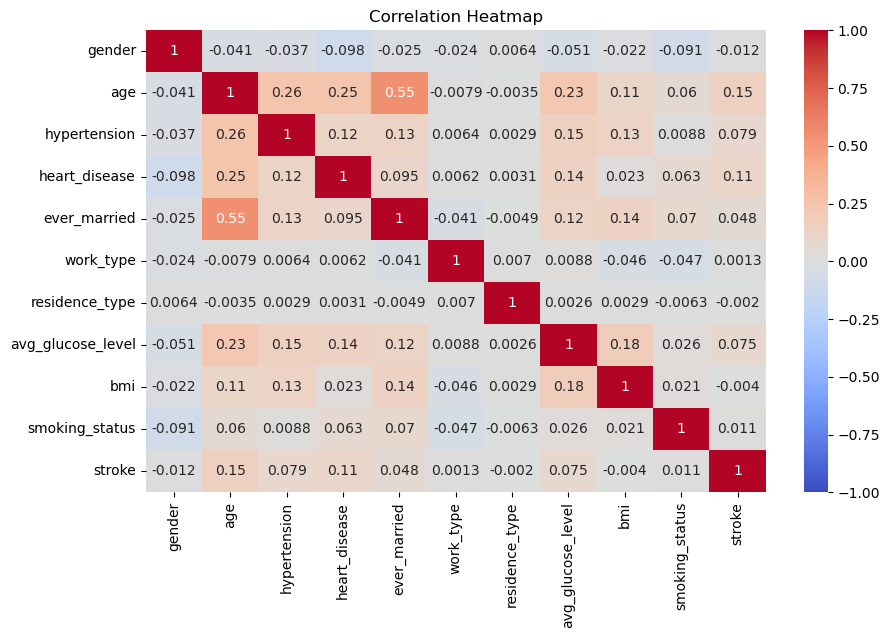

In [7]:
corr = df.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

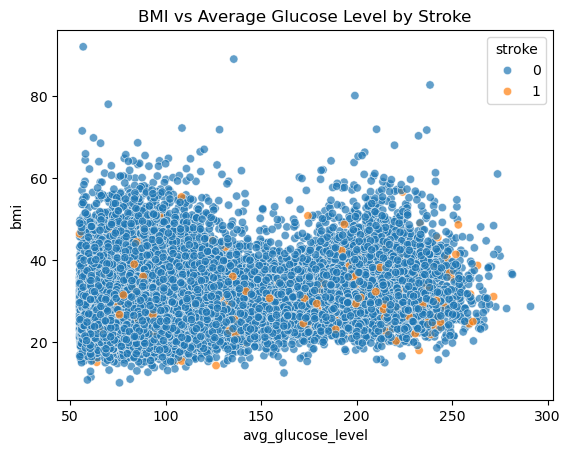

In [8]:
sns.scatterplot(data=df, x='avg_glucose_level', y='bmi', hue='stroke', alpha=0.7)
plt.title('BMI vs Average Glucose Level by Stroke')
plt.show()

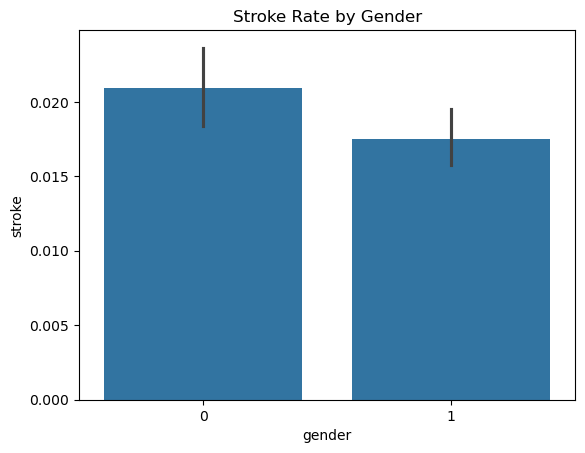

In [9]:
sns.barplot(data=df, x='gender', y='stroke')
plt.title('Stroke Rate by Gender')
plt.show()

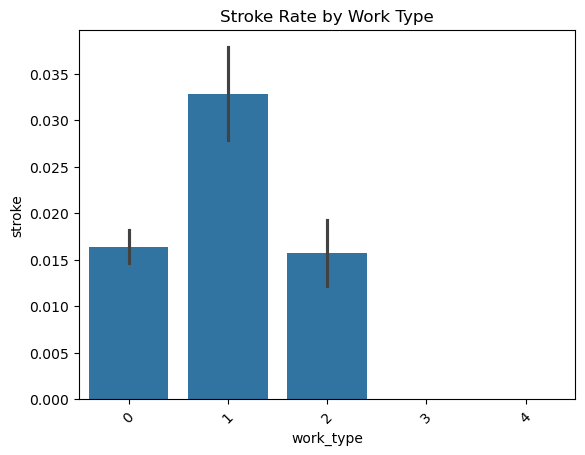

In [10]:
sns.barplot(data=df, x='work_type', y='stroke')
plt.xticks(rotation=45)
plt.title('Stroke Rate by Work Type')
plt.show()

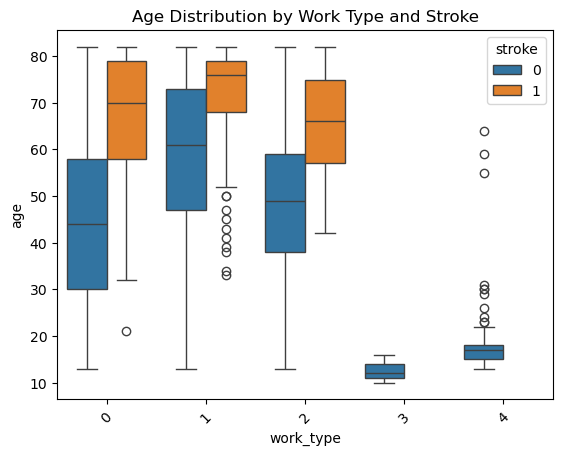

In [11]:
sns.boxplot(data=df, x='work_type', y='age', hue='stroke')
plt.title('Age Distribution by Work Type and Stroke')
plt.xticks(rotation=45)
plt.show()

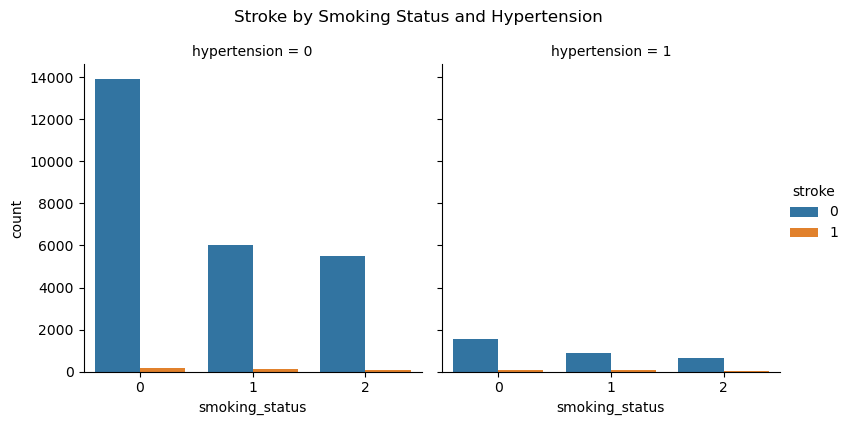

In [12]:
sns.catplot(data=df, x='smoking_status', col='hypertension', hue='stroke', kind='count', height=4, aspect=1)
plt.suptitle('Stroke by Smoking Status and Hypertension', y=1.05)
plt.show()

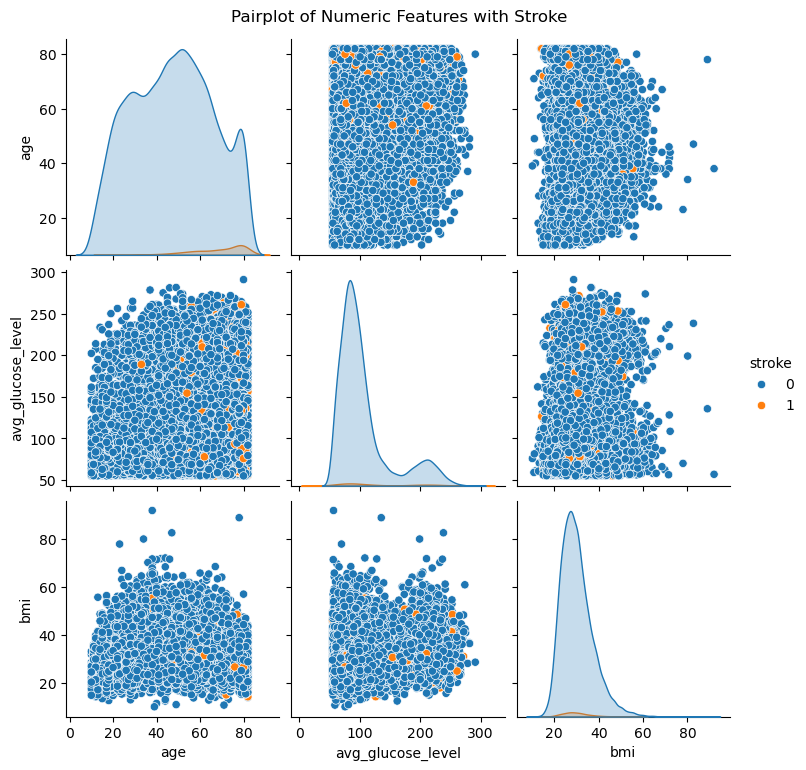

In [13]:
sns.pairplot(df[['age', 'avg_glucose_level', 'bmi', 'stroke']], hue='stroke')
plt.suptitle('Pairplot of Numeric Features with Stroke', y=1.02)
plt.show()

### Split Train and Test Data

In [14]:
X = df.drop('stroke', axis=1)

In [15]:
y = df['stroke']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Building Base Model and Hyper Parameter Tuning

In [17]:
base_model = DecisionTreeClassifier()

In [18]:
params = {
    'criterion': ['entropy', 'gini'],
    'splitter': ['random', 'best'],
    'max_depth': [1, 2, 3, 4, 5],
    'min_samples_leaf': [1, 2, 3, 4, 5]
}

In [19]:
grid_search = GridSearchCV(estimator=base_model, param_grid=params, scoring='accuracy', cv=5, verbose=0)

In [20]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'splitter': ['random', 'best']},
             scoring='accuracy')

In [21]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       splitter='random')

In [22]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 2,
 'splitter': 'random'}

In [23]:
grid_search.best_score_

0.9806912184440957

### Building Final Model

In [24]:
model = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_leaf=2)

In [25]:
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       splitter='random')

In [26]:
pred = model.predict(X_test)

### Evaluate Performance

In [27]:
accuracy_score(y_test, pred)

0.9821726438698916

In [28]:
confusion_matrix(y_test, pred)

array([[9421,    0],
       [ 171,    0]], dtype=int64)